##Setup

You will need to make a copy of this notebook in your Google Drive before you can edit the homework files. You can do so with **File &rarr; Save a copy in Drive**.

In [1]:
#@title mount your Google Drive
#@markdown Your work will be stored in a folder called `cs285_f2021` by default to prevent Colab instance timeouts from deleting your edits.

import os
from google.colab import drive
drive._mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#@title set up mount symlink

DRIVE_PATH = '/content/gdrive/My\ Drive/CS285Project/code'
DRIVE_PYTHON_PATH = DRIVE_PATH.replace('\\', '')
if not os.path.exists(DRIVE_PYTHON_PATH):
  %mkdir $DRIVE_PATH

## the space in `My Drive` causes some issues,
## make a symlink to avoid this
SYM_PATH = '/content/code'
if not os.path.exists(SYM_PATH):
  !ln -s $DRIVE_PATH $SYM_PATH

In [3]:
#@title apt install requirements

#@markdown Run each section with Shift+Enter

#@markdown Double-click on section headers to show code.

!apt update 
!apt install -y --no-install-recommends \
        build-essential \
        curl \
        git \
        gnupg2 \
        make \
        cmake \
        ffmpeg \
        swig \
        libz-dev \
        unzip \
        zlib1g-dev \
        libglfw3 \
        libglfw3-dev \
        libxrandr2 \
        libxinerama-dev \
        libxi6 \
        libxcursor-dev \
        libgl1-mesa-dev \
        libgl1-mesa-glx \
        libglew-dev \
        libosmesa6-dev \
        lsb-release \
        ack-grep \
        patchelf \
        wget \
        xpra \
        xserver-xorg-dev \
        xvfb \
        python-opengl \
        ffmpeg > /dev/null 2>&1

!pip install opencv-python==4.4.0.42
!pip install gym
!pip install beautifultable
!pip install pyvirtualdisplay

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [4]:
#@title download mujoco

MJC_PATH = '{}/mujoco'.format(SYM_PATH)
if not os.path.exists(MJC_PATH):
  %mkdir $MJC_PATH
%cd $MJC_PATH
if not os.path.exists(os.path.join(MJC_PATH, 'mujoco200')):
  !wget -q https://www.roboti.us/download/mujoco200_linux.zip
  !unzip -q mujoco200_linux.zip
  %mv mujoco200_linux mujoco200
  %rm mujoco200_linux.zip

/content/gdrive/.shortcut-targets-by-id/1oYjymk0ImgpiYCrrJm21JS8tlP_mu2r_/CS285Project/code/mujoco


In [5]:
#@title update mujoco paths

import os

os.environ['LD_LIBRARY_PATH'] += ':{}/mujoco200/bin'.format(MJC_PATH)
os.environ['MUJOCO_PY_MUJOCO_PATH'] = '{}/mujoco200'.format(MJC_PATH)
os.environ['MUJOCO_PY_MJKEY_PATH'] = '{}/mjkey.txt'.format(MJC_PATH)

## installation on colab does not find *.so files
## in LD_LIBRARY_PATH, copy over manually instead
!cp $MJC_PATH/mujoco200/bin/*.so /usr/lib/x86_64-linux-gnu/

Ensure your `mjkey.txt` is in /content/CS285Project/mujoco before this step

In [6]:
#@title clone and install mujoco-py

%cd $MJC_PATH
if not os.path.exists('mujoco-py'):
  !git clone https://github.com/openai/mujoco-py.git
%cd mujoco-py
%pip install -e .

## cythonize at the first import
import mujoco_py

/content/gdrive/.shortcut-targets-by-id/1oYjymk0ImgpiYCrrJm21JS8tlP_mu2r_/CS285Project/code/mujoco
/content/gdrive/.shortcut-targets-by-id/1oYjymk0ImgpiYCrrJm21JS8tlP_mu2r_/CS285Project/code/mujoco/mujoco-py
Obtaining file:///content/gdrive/.shortcut-targets-by-id/1oYjymk0ImgpiYCrrJm21JS8tlP_mu2r_/CS285Project/code/mujoco/mujoco-py
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Attempting uninstall: mujoco-py
    Found existing installation: mujoco-py 2.0.2.5
    Uninstalling mujoco-py-2.0.2.5:
      Successfully uninstalled mujoco-py-2.0.2.5
  Running setup.py develop for mujoco-py


In [7]:
# #@title clone MEP repo

# %cd $SYM_PATH
# !git clone https://github.com/ruizhaogit/mep.git

In [8]:
#@title clone G-HGG repo

%cd $SYM_PATH
# !git clone https://github.com/BZSROCKETS/G-HGG.git

%cd G-HGG
%pip install -r requirements.txt
# %pip install -e .

/content/gdrive/.shortcut-targets-by-id/1oYjymk0ImgpiYCrrJm21JS8tlP_mu2r_/CS285Project/code
/content/gdrive/.shortcut-targets-by-id/1oYjymk0ImgpiYCrrJm21JS8tlP_mu2r_/CS285Project/code/G-HGG
Obtaining gym from git+https://github.com/mbrucker07/gym@0e011cfd1c057603b49df56b55bd01abf0c71d3f#egg=gym (from -r requirements.txt (line 26))
  Skipping because already up-to-date.
  Using cached mujoco-py-2.0.2.5.tar.gz (769 kB)
     |████████████████████████████████| 28.3 MB 2.3 MB/s 
  Created wheel for mujoco-py: filename=mujoco_py-2.0.2.5-py3-none-any.whl size=3366750 sha256=3939628a6319adc0a4e2753b4580a45b8cac1fc761908d5a3caf5fb8a06c5071
  Stored in directory: /root/.cache/pip/wheels/63/2e/d7/890ee72ba3c3e36d7d693b3201a2c1886d367d57d3945a4cc2
Successfully built mujoco-py
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.4.0.42
    Uninstalling opencv-python-4.4.0.42:
      Successfully uninstalled opencv-python-4.4.0.42
  Attempting uninstall: mujoco-py
  

In [ ]:
#@title set up virtual display

from pyvirtualdisplay import Display

display = Display(visible=0, size=(1400, 900))
display.start()

# For later
from colab_utils import (
    wrap_env,
    show_video
)

ModuleNotFoundError: ignored

In [ ]:
#@title test virtual display

#@markdown If you see a video of a FetchSlide, setup is complete!

import gym
import matplotlib
matplotlib.use('Agg')

env = wrap_env(gym.make("FetchSlide-v1"))

observation = env.reset()
for i in range(10):
    env.render(mode='rgb_array')
    obs, rew, term, _ = env.step(env.action_space.sample() ) 
    if term:
      break;
            
env.close()
print('Loading video...')
show_video()

ModuleNotFoundError: ignored

In [ ]:
# ! python train.py --tag 000 --learn normal --env FetchPush-v1 --goal custom
# Fetch Slide + PushandSlide
# ! python train.py --tag 000 --learn hgg --env FetchPush-v1 --goal custom --buffer_type mep 
! python train.py --tag mep-temp-01 --learn hgg --env FetchPush-v1 --goal custom --buffer_type mep --temp 0.1

tag: mep-temp-01
alg: ddpg
learn: hgg
env: FetchPush-v1
goal: custom
init_offset: 1.0
graph: False
show_goals: 0
play_path: None
play_epoch: latest
stop_hgg_threshold: 2
n_x: 31
n_y: 31
n_z: 11
temp: 0.10000000149011612
gamma: 0.98
clip_return: True
eps_act: 0.3
std_act: 0.2
pi_lr: 0.001
q_lr: 0.001
act_l2: 1.0
polyak: 0.95
epoches: 20
cycles: 20
episodes: 50
timesteps: 50
train_batches: 20
buffer_size: 10000
buffer_type: mep
batch_size: 256
warmup: 10000
her: future
her_ratio: 0.8
pool_rule: full
hgg_c: 3.0
hgg_L: 5.0
hgg_pool_size: 1000
save_acc: True
rank_method: dense
num_vertices: [31, 31, 11]
goal_based: True
clip_return_l: -49.99999999999996
clip_return_r: 0.0


2021-12-14 17:15:23.220140: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-12-14 17:15:23.223733: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200240000 Hz
2021-12-14 17:15:23.223960: I ten

In [ ]:
m! python plot.py figures/FetchSlide FetchSlide-v1 --naming 0 --e_per_c 20

exporting FetchSlide-v1
No handles with labels found to put in legend.


In [ ]:
! python play.py --env FetchSlide-v1 --goal custom --play_path figures/BA_Labyrinth/000-ddpg-FetchPushLabyrinth-v1-hgg-mesh-stop --play_epoch best

In [ ]:
#@markdown You can visualize your runs with tensorboard from within the notebook

## requires tensorflow==2.3.0
# %reload_ext tensorboard
%tensorboard --logdir /content/cs285_f2021/homework_fall2021/hw3/data/

In [ ]:
 ! pip uninstall pandas
 ! pip install --upgrade pandas==0.23.0

Found existing installation: pandas 0.24.2
Uninstalling pandas-0.24.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pandas-0.24.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas/*
Proceed (y/n)? y
  Successfully uninstalled pandas-0.24.2
     |████████████████████████████████| 13.1 MB 29.7 MB/s 
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/main.py", line 71, in main
    return command.main(cmd_args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 104, in main
    return self._main(args)
  File "/usr/lib/python3.7/contextlib.py", line 119, in __exit__
    next(self.gen)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/command_context.py", line 22, in main_context
    yield
  File "/usr/lib/python3.7/contextlib.py", line 524, in __exit__
    raise

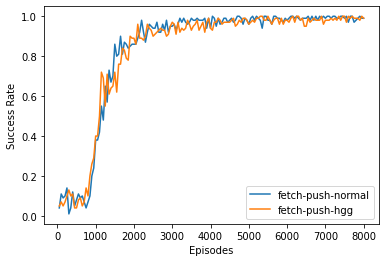

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot(name, label):
  df = pd.read_csv(name)
  success = np.array(df["Success"])
  episodes = np.array(df["Episodes"])
  success = success[episodes <= 8000]
  episodes = episodes[episodes <= 8000]
  plt.plot(episodes, success, label=label)

# plot("log/000-ddpg-FetchSlide-v1-normal/progress.csv", "fetch-slide-normal")
# plot("log/000-ddpg-FetchSlide-v1-hgg/progress.csv", "fetch-slide-hgg")

plot("log/000-ddpg-FetchPush-v1-normal-07-12-2021_06-03-18/progress.csv", "fetch-push-normal")
plot("log/000-ddpg-FetchPush-v1-hgg-07-12-2021_16-22-03/progress.csv", "fetch-push-hgg")

plt.xlabel("Episodes")
plt.ylabel("Success Rate")
plt.legend()